- 本数据集共有大约1200万条数据，数据为淘宝APP2014年11月18日至2014年12月18日的用户行为数据，共6列字段，列字段分别是：
    - user_id：用户身份，脱敏
    - item_id：商品ID，脱敏
    - behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
    - user_geohash：地理位置
    - item_category：品类ID（商品所属的品类）
    - time：用户行为发生的时间

- 提出问题
    - 不同时间维度下用户活跃度如何变化？
    - 用户的留存情况如何（复购率及漏斗流失情况）？
    - 用户价值情况？
    - 不同商品的销售状况如何？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 数据预处理

In [2]:
data = pd.read_csv('./data/tianchi_mobile_recommend_train_user.csv')
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [4]:
# 查看重复值数量
data[data.duplicated()].count()

user_id          4092866
item_id          4092866
behavior_type    4092866
user_geohash       66057
item_category    4092866
time             4092866
dtype: int64

In [5]:
data[data.duplicated()]

,user_id,item_id,behavior_type,user_geohash,item_category,time
51,103802946,194298205,1,NaN,11406,2014-12-18 21
75,103891828,149380817,1,NaN,7876,2014-12-08 21
107,116730636,303940848,1,NaN,11956,2014-12-15 12
122,104811265,26017196,1,NaN,10585,2014-12-12 22
144,100684618,278753736,1,NaN,1606,2014-12-14 11
...,...,...,...,...,...,...
12256897,91530370,330719178,1,NaN,12090,2014-12-15 01
12256898,91530370,82755420,1,NaN,12553,2014-12-03 00
12256899,91530370,58196276,1,NaN,12553,2014-11-26 10
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21


In [6]:
# 删除重复值
data.drop_duplicates(inplace=True)

In [7]:
#查看缺失值
data.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [8]:
data

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...
12256886,91530370,293543750,3,NaN,552,2014-12-04 23
12256900,91530370,101985395,3,NaN,12090,2014-12-12 21
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16


In [9]:
# 缺失值均为地理信息，对用户行为分析无影响，不做处理


In [10]:
#恢复索引
data.reset_index()

,index,user_id,item_id,behavior_type,user_geohash,item_category,time
0,0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...,...
8164035,12256886,91530370,293543750,3,NaN,552,2014-12-04 23
8164036,12256900,91530370,101985395,3,NaN,12090,2014-12-12 21
8164037,12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
8164038,12256903,93812622,234391443,1,NaN,8765,2014-12-11 16


In [11]:
# 将time列拆分为date列和hour列
data['hour']=data['time'].str[-2:]

In [12]:
data['date']=data['time'].str[:-2]

In [13]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,hour,date
0,98047837,232431562,1,NaN,4245,2014-12-06 02,02,2014-12-06
1,97726136,383583590,1,NaN,5894,2014-12-09 20,20,2014-12-09
2,98607707,64749712,1,NaN,2883,2014-12-18 11,11,2014-12-18
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,10,2014-12-06
4,98145908,290208520,1,NaN,13926,2014-12-16 21,21,2014-12-16


In [14]:
#将item_id和item_category转换成str
data['item_id']=data['item_id'].astype('str')
data['item_category']=data['item_category'].astype('str')


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164040 entries, 0 to 12256904
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        object
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  object
 5   time           object
 6   hour           object
 7   date           object
dtypes: int64(2), object(6)
memory usage: 560.6+ MB


In [16]:
data['date']=pd.to_datetime(data['date'])  #转化为datatime类型

In [17]:
del data['time']  #删除

### 用户行为分析（AARRR模型）

#### 活跃度

- 每天活跃度的变化
    - 计算出日访问量，日独立访客量和人均访问量，封装成一个新的df

In [18]:
#日访问量：一个用户每天访问的次数
pv_day = data[data.behavior_type==1].groupby('date').count()['user_id']

In [19]:
pv_day.reset_index().rename(columns={'user_id':'pv'})

,date,pv
0,2014-11-18,215480
1,2014-11-19,213108
2,2014-11-20,206740
3,2014-11-21,196121
4,2014-11-22,213292
5,2014-11-23,225481
6,2014-11-24,224427
7,2014-11-25,214498
8,2014-11-26,209100
9,2014-11-27,217105


In [20]:
#日独立访客量：一个用户一天无论访问多少次都算一次
pv_day_dl=data[data.behavior_type==1].groupby(by=['date','user_id'])['behavior_type'].count()

In [21]:
pv_day_dl=pv_day_dl.groupby('date').nunique().reset_index().rename(columns={'behavior_type':'uv'})

In [22]:
pv_day_dl

,date,uv
0,2014-11-18,287
1,2014-11-19,276
2,2014-11-20,283
3,2014-11-21,265
4,2014-11-22,282
5,2014-11-23,278
6,2014-11-24,287
7,2014-11-25,283
8,2014-11-26,280
9,2014-11-27,293


In [23]:
#人均访问量（日访问量/日独立访问量）
df = pd.merge(pv_day,pv_day_dl,on='date')
df['人均访问量']=df['user_id']/df['uv']
df.columns=['date','pv','uv','人均访问量']
df

,date,pv,uv,人均访问量
0,2014-11-18,215480,287,750.801394
1,2014-11-19,213108,276,772.130435
2,2014-11-20,206740,283,730.530035
3,2014-11-21,196121,265,740.079245
4,2014-11-22,213292,282,756.354610
5,2014-11-23,225481,278,811.082734
6,2014-11-24,224427,287,781.975610
7,2014-11-25,214498,283,757.943463
8,2014-11-26,209100,280,746.785714
9,2014-11-27,217105,293,740.972696


- 结论：在12月5日之前，活跃度在一定水平上波动。12月5日后，活跃度开始明显上升，并在双十二当天达到峰值。
- 可能原因：12月5日之后双十二预热活动开始，用户活跃度上升。

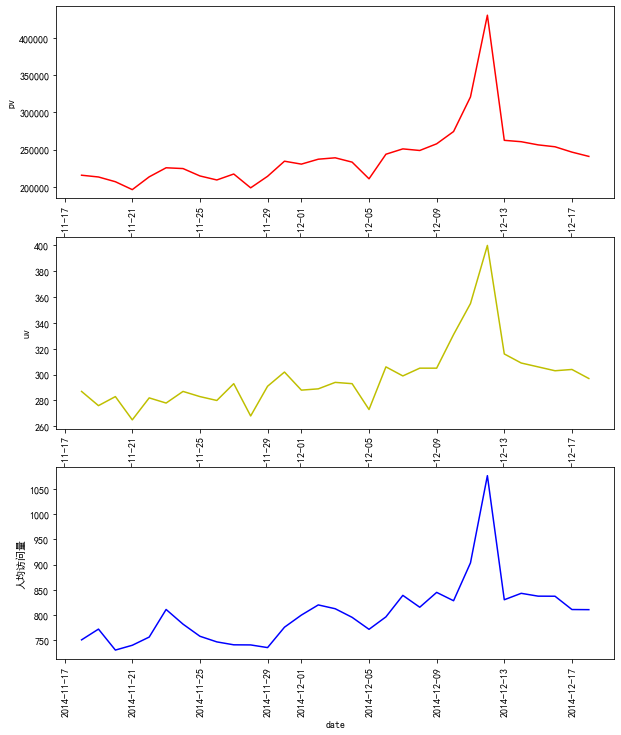

In [24]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.lineplot(x=df['date'],y=df['pv'],color='r')
plt.xticks(rotation=90)
plt.subplot(3,1,2)
sns.lineplot(x=df['date'],y=df['uv'],color='y')
plt.xticks(rotation=90)
plt.subplot(3,1,3)
sns.lineplot(x=df['date'],y=df['人均访问量'],color='b')
plt.xticks(rotation=90)
plt.show()

- 双十二当天活跃度的变化
    - 选择双十二当天的数据，分析其活跃时间段
        - 双12当天每小时的访问量
        - 双12当天每小时的访客量
        - 双12当天每小时的人均访问量
            - 形成一个新的df

In [25]:
#取出双12当天的数据
data[data['date'].str.startswith('2014-12-12')].head()

AttributeError: Can only use .str accessor with string values!

In [ ]:
#查看双12当天每小时的访问量
#访问量-时
pv_hour = data[data.behavior_type==1].groupby('hour').count()['user_id'].reset_index()
pv_hour.columns = ['hour','pv']
pv_hour


In [ ]:
#查看双12当天每小时的访客量
#访问数-时
uv_hour = data.groupby('hour').nunique()['user_id'].reset_index()
uv_hour.columns = ['hour','uv']
uv_hour

In [ ]:
#查看双12当天每小时的人均访问量
df1 = pd.merge(uv_hour,pv_hour,on='hour')
df1['人均访问量']=np.round(df1['pv']/df1['uv'],1)
df1

- 结论：双十二当天0点和18点之后淘宝用户活跃度较高，6点跌至最低点。
- 建议：商家可以在18点后设置优惠券或采取其他促销手段，吸引更多人消费，提高购买率。

- 不同用户行为下的活跃度变化
    - 查看每天不同行为的各自的总量
        - 提示：源数据中的一行数据表示一个用户的某一个行为的数据
        - 注意：aggfunc的count和size的区别

In [ ]:
x_data,y_data=df1.index.tolist(),df1.pv.tolist()
(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts('双十二当天每小时的访问量',pos_left='center'))
    .render_notebook()
)

In [ ]:
x_data,y_data=df1.index.tolist(),df1.uv.tolist()
(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts('双十二当天每小时的访客量',pos_left='center'))
    .render_notebook()
)

In [ ]:
x_data,y_data=df1.index.tolist(),df1.人均访问量.tolist()
(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(title_opts=opts.TitleOpts('双十二当天每小时的人均访问量',pos_left='center'))
    .render_notebook()
)

- 将四种行为的总量绘制在一个坐标系中查看

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=df3['用户行为'],height=df3['访问量']/1e6,color='#990066',width=0.5,edgecolor='r')
plt.ylabel('用户行为总量(百万)',fontdict={'fontsize':10,'color':'g','fontweight':'bold'})
plt.xticks(np.arange(5),(0,1,2,3,4))
plt.show()

In [ ]:
df2=data.pivot_table(index='date',columns='behavior_type',aggfunc='size')
df2.head()

In [ ]:
df3=data.groupby(by=['date','behavior_type'])['user_id'].count()
df3=df3.unstack()
df3

In [ ]:
df3.columns=['点击','加购物车','收藏','支付']

In [ ]:
def draw_chart(x_data,y_data,title=''):
    c = (
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=False),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
        )
        .add_xaxis(xaxis_data=x_data)
        .add_yaxis(
            series_name="",
            y_axis=y_data,
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title,pos_left='center'))
        .render_notebook()
    )
    return c

In [ ]:
draw_chart(df3.index.date.tolist(),df3['点击'],'点击趋势图')

In [ ]:
draw_chart(df3.index.date.tolist(),df3['收藏'],'收藏趋势图')

In [ ]:
draw_chart(df3.index.date.tolist(),df3['支付'],'支付趋势图')

In [ ]:
(
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=False),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
        )
        .add_xaxis(xaxis_data=df3.index.date.tolist())#x轴数据
        .add_yaxis(
            series_name="收藏",
            y_axis=df3['收藏'].values.tolist(),
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
            color='red'
        )
     .add_yaxis(
            series_name="加购物车",
            y_axis=df3['加购物车'].values.tolist(),
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
         color='blue'
        )
     .add_yaxis(
            series_name="支付",
            y_axis=df3['支付'].values.tolist(),
            symbol="emptyCircle",
            is_symbol_show=True,
            label_opts=opts.LabelOpts(is_show=False),
         color='green'
        )
#         .set_global_opts(title_opts=opts.TitleOpts(title,pos_left='center'))
        .render_notebook()
    )

- 结论：
    - 点击、收藏、加购物车、支付这四种行为均在双十二当天达到顶峰。
    - 只观察支付和收藏，发现双十二当天支付量大于收藏量。
        - 支付量大于收藏量说明很多用户购买了目标之外的商品，可能是受到促销的影响冲动消费，又或者是为了凑单等。


#### 留存率

- 漏斗转化情况
    - 查看不同行为的总量，封装到df中
    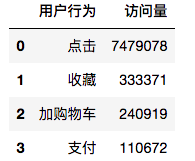
    - 单一环节转化率(%)-各环节转换率作为新的列存在
        - 计算点击到收藏、收藏到加购，加购到支付的转化率
    - 整体转化率(%)-作为新的一列存在
        - 计算点击到收藏、加购和支付的整体转化率
    - 每一环节流失率(%)
        - 100-单一环节转化率

In [ ]:
#查看不同行为的访问量，封装到df中
df3=data.groupby(by=['behavior_type']).count()['user_id'].reset_index()
df3.columns=['用户行为','访问量']
df3

In [ ]:
df3['用户行为'].replace({1:'点击',2:'加购物车',3:'收藏',4:'支付'},inplace=True)
df3.sort_values(by='访问量',ascending=False,inplace=True)
df3

In [ ]:
df3['1']=df3.shift(periods=1)['访问量']

In [ ]:
df3['转化率']=df3['访问量']/df3['1']*100

In [ ]:
df3.drop(columns='1',inplace=True)

In [ ]:
df3

In [ ]:
#计算整体转化率
#点击
behavior_type1=data.groupby('behavior_type').count()['user_id'].iloc[0]
#收藏
behavior_type2=data.groupby('behavior_type').count()['user_id'].iloc[2]
#加购物车
behavior_type3=data.groupby('behavior_type').count()['user_id'].iloc[1]
#支付
behavior_type4=data.groupby('behavior_type').count()['user_id'].iloc[3]

In [ ]:
pv_favor=behavior_type2/behavior_type1
pv_cart=behavior_type3/behavior_type1
pv_buy=behavior_type4/behavior_type1
df3['整体转化率']=[np.NAN,pv_favor,pv_cart,pv_buy]
df3

In [ ]:
#计算每一环节流失率(%)
a = (behavior_type1-behavior_type2)/behavior_type1*100
b = (behavior_type2-behavior_type3)/behavior_type2*100
c = (behavior_type3-behavior_type4)/behavior_type3*100
df3['流失率']=[np.NAN,a,b,c]
df3

In [ ]:
res=df3.iloc[:,[0,3]]
res.iloc[0,1]=1
res

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

c = (
    Funnel()
    .add("用户行为",[list(z) for z in zip(res['用户行为'],res['整体转化率'])])
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为-整体转化率"))
    .render_notebook()
)

c

- 结论：用户的流失主要发生在点击-收藏环节。

- 可能原因及建议
    - 点击-收藏环节流失
        - 原因：用户被投放的广告吸引，进入后发现与预期严重不合，造成流失。
        - 建议：优化广告。
        - 原因：客户通过检索或推荐到列表页面但没找到合适的产品，造成流失。
        - 建议：更新搜索引擎和相关算法，尽可能精准推送相关内容。
        - 原因：如果商品的评价过低，造成流失。
        - 建议：商家要做进一步调查，分析用户对商品评价低的原因，进一步改进，提升用户的购物体验，最终可以口碑营销。
    - 收藏-加购物车环节流失
        - 此类用户有较强的购买需求。可以对用户进行精准推送促销信息，刺激用户完成购买。
    - 加购物车-支付环节流失
        - 原因：生成订单页面步骤过多。
        - 建议:
            - 优化购物流程，尽可能支持多种支付方式，如银行卡、微信支付、支付宝支付、花呗等。
            - 考虑目前到淘宝的购物流程已经很难再简化，需要商家进一步调查，了解用户放弃支付的原因，方便做出调整。

#### 复购情况分析
- 用户购买次数直方图
- 计算复购率=购买次数大于1的用户数量/有购买行为的用户总数

In [53]:
#用户购买次数直方图（先获取购买商品的行数据）
df3=data[data['behavior_type']==4]

In [54]:
df3['user_id'].nunique()

8886

In [55]:
res=df3['user_id'].value_counts()

In [56]:
res[res>1].size

8126

In [59]:
rate= res[res>1].size/df3['user_id'].nunique()
rate

0.9144722034661265

In [61]:
print('复购率为：','%.2f'%rate)

复购率为： 0.91


Text(0, 0.5, '用户数')

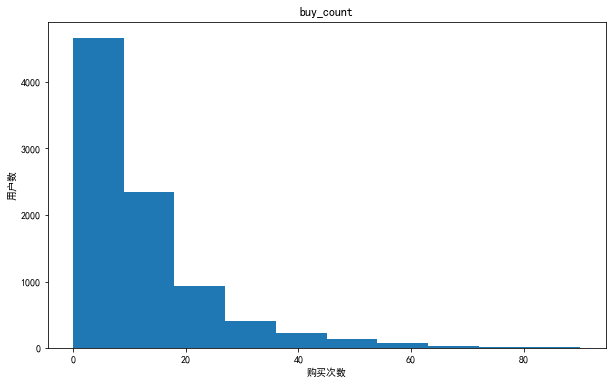

In [73]:
#用户购买次数直方图（先获取购买商品的行数据）
plt.figure(figsize=(10,6))
plt.hist(x=res,range=[0,90])
plt.title('buy_count')
plt.xlabel('购买次数')
plt.ylabel('用户数')

In [67]:
#计算复购率=购买次数大于1的用户数量/有购买行为的用户总数
#购买用户
buy_user = data[data.behavior_type==4].nunique()['user_id']
user_buy=data[data.behavior_type==4].groupby('user_id').count()
user_two=user_buy[user_buy['item_id']>1].count()['item_id']
rebuy_rate=user_two/buy_user*100
print('复购率为：','%.2f'%rebuy_rate,'%')


复购率为： 91.45 %


- 结论：2014年11月18日至2014年12月18日这一个月用户复购率高达91.45%

### 用户价值分析（RMF模型）
- 对已购用户进行价值划分
- 各类用户占比

In [120]:
def user_buy(x,end):
    r=min((end-x['date']).dt.days)
    f=x.shape[0]  
    return pd.Series([r,f],index=['R','F'])

In [121]:
df3['date'].max()

Timestamp('2014-12-18 00:00:00')

In [122]:
df3.groupby('user_id').apply(user_buy,end=df3['date'].max())

,R,F
user_id,,
4913,2,6
6118,1,1
7528,5,6
7591,5,21
12645,4,8
...,...,...
142376113,10,1
142412247,3,11
142430177,0,5


In [133]:
#将已购用户的数据单独取出
rfm=df3.groupby('user_id').apply(user_buy,end=df3['date'].max())

In [134]:
avg_r,avg_f=rfm['R'].mean(),rfm['F'].mean()

In [135]:
avg_r,avg_f

(5.811838847625478, 12.45464776052217)

In [136]:
rfm['R']=rfm['R'].map(lambda x:(1 if x>avg_r else 0))
rfm['F']=rfm['F'].map(lambda x:(1 if x>avg_f else 0))

In [137]:
rfm

,R,F
user_id,,
4913,0,0
6118,0,0
7528,0,0
7591,0,1
12645,0,0
...,...,...
142376113,1,0
142412247,0,0
142430177,0,0


In [138]:
dic={'11':'重要价值用户','10':'重要发展用户','01':'重要保持用户','00':'重要挽留用户'}

In [139]:
rfm

,R,F
user_id,,
4913,0,0
6118,0,0
7528,0,0
7591,0,1
12645,0,0
...,...,...
142376113,1,0
142412247,0,0
142430177,0,0


In [158]:
rfm['R']=rfm['R'].astype('str')

In [159]:
rfm['F']=rfm['F'].astype('str')

In [160]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 4913 to 142455899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   R       8886 non-null   object
 1   F       8886 non-null   object
 2   tag     8886 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 277.7+ KB


In [161]:
rfm['tag']=rfm['R']+rfm['F']

In [162]:
rfm

,R,F,tag
user_id,,,
4913,0,0,00
6118,0,0,00
7528,0,0,00
7591,0,1,01
12645,0,0,00
...,...,...,...
142376113,1,0,10
142412247,0,0,00
142430177,0,0,00


In [163]:
rfm['tag']=rfm['tag'].map(dic)
rfm

,R,F,tag
user_id,,,
4913,0,0,重要挽留用户
6118,0,0,重要挽留用户
7528,0,0,重要挽留用户
7591,0,1,重要保持用户
12645,0,0,重要挽留用户
...,...,...,...
142376113,1,0,重要发展用户
142412247,0,0,重要挽留用户
142430177,0,0,重要挽留用户


In [29]:
#RFM
#各类用户占比
#R值 最近消费的时间
last_time=data[data.behavior_type==4].groupby('user_id')['date'].max()
r=(pd.to_datetime(data.date.max())-pd.to_datetime(last_time)).dt.days
r_avg=r.mean()
r[r<r_avg]=0
r[r>r_avg]=1
#F值 消费次数
f=data[data.behavior_type==4].groupby('user_id').count()['item_id']
f_avg=f.mean()
f[f<f_avg]=0
f[f>f_avg]=1


In [30]:
RFM=pd.merge(r,f,on='user_id',how='inner')
RFM=RFM.reset_index().rename(columns={'date':'r','item_id':'f'})
RFM=RFM[['r','f']].astype('str')
RFM['user_type']=RFM['r']+RFM['f']
res = RFM.groupby('user_type').count()['r'].sort_index(ascending=False).rename(index={'11':'重要价值用户','10':'重要发展用户','01':'重要保持用户','00':'重要挽留用户'})
res

user_type
重要价值用户     464
重要发展用户    3042
重要保持用户    2412
重要挽留用户    2968
Name: r, dtype: int64

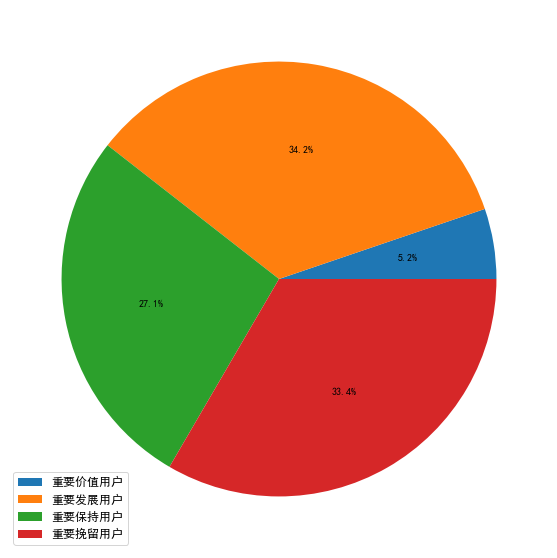

In [32]:
#RFM
plt.figure(figsize = (10,10))
plt.pie(res,autopct='%.1f%%')
plt.legend(res.reset_index().rename(columns={'user_id':'uv'}).user_type,fontsize = 12)
plt.show()


- 结论
    - 重要挽留客户：占比最大，该类用户消费时间间隔较远，并且消费频次低。需要主动联系客户，调查清楚哪里出现了问题，可以通过短信，邮件，APP推送等唤醒客户，尽可能减少流失。
    - 重要发展客户：消费频次低，可以适当给点折扣或捆绑销售来增加用户的购买频率，尽可能提高留存率。
    - 重要价值客户：为重点用户，但用户比较少。可以针对性地给这类客户提供 VIP服务；
    - 重要保持客户：消费时间间隔较远，但是消费频次高。该类用户可能一次性购买很多东西。对于这类客户，需要主动联系，关注他们的购物习性做精准化营销，及时满足这类用户的需求。
